## Import Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#📌 Extracão

In [3]:
# Leitura da base de dados tirado da API
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
data[1]

{'customerID': '0003-MKNFE',
 'Churn': 'No',
 'customer': {'gender': 'Male',
  'SeniorCitizen': 0,
  'Partner': 'No',
  'Dependents': 'No',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'No',
  'DeviceProtection': 'No',
  'TechSupport': 'No',
  'StreamingTV': 'No',
  'StreamingMovies': 'Yes'},
 'account': {'Contract': 'Month-to-month',
  'PaperlessBilling': 'No',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 59.9, 'Total': '542.4'}}}

# Dicionário dos dados

- customerID: número de identificação único de cada cliente

- Churn: se o cliente deixou ou não a empresa

- gender: gênero (masculino e feminino)

- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

- Partner: se o cliente possui ou não um parceiro ou parceira

- Dependents: se o cliente possui ou não dependentes

- tenure: meses de contrato do cliente

- PhoneService: assinatura de serviço telefônico

- MultipleLines: assisnatura de mais de uma linha de telefone

- InternetService: assinatura de um provedor internet

- OnlineSecurity: assinatura adicional de segurança online

- OnlineBackup: assinatura adicional de backup online

- DeviceProtection: assinatura adicional de proteção no
dispositivo

- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

- StreamingTV: assinatura de TV a cabo

- StreamingMovies: assinatura de streaming de filmes

- Contract: tipo de contrato

- PaperlessBilling: se o cliente prefere receber online a fatura

- PaymentMethod: forma de pagamento

- Charges.Monthly: total de todos os serviços do cliente por mês

- Charges.Total: total gasto pelo cliente

#🔧 Transformação

In [4]:
# Normalizar os dicionários aninhados
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Remover os prefixos, mantendo apenas o nome final
df.columns = [col.split('.')[-1] for col in df.columns]
print(df.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')


In [7]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3495
Yes,3065
No phone service,707


In [6]:
for col in df.columns:
    n_unique = df[col].nunique(dropna=False)
    print(f"\n Coluna: {col} ({n_unique} categorias)")
    print(df[col].unique())



 Coluna: customerID (7267 categorias)
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

 Coluna: Churn (3 categorias)
['No' 'Yes' '']

 Coluna: gender (2 categorias)
['Female' 'Male']

 Coluna: SeniorCitizen (2 categorias)
[0 1]

 Coluna: Partner (2 categorias)
['Yes' 'No']

 Coluna: Dependents (2 categorias)
['Yes' 'No']

 Coluna: tenure (73 categorias)
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

 Coluna: PhoneService (2 categorias)
['Yes' 'No']

 Coluna: MultipleLines (3 categorias)
['No' 'Yes' 'No phone service']

 Coluna: InternetService (3 categorias)
['DSL' 'Fiber optic' 'No']

 Coluna: OnlineSecurity (3 categorias)
['No' 'Yes' 'No internet service']

 Coluna: OnlineBackup (3 categorias)
['Yes' 'No' 'No internet service']

 Coluna: DeviceProtection (3 categorias)
['

## Padronização

In [8]:
# Lista de colunas a padronizar
colunas_binarias = [
    'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling','OnlineSecurity'
]

# Padronizar valores: Yes -> 1, No -> 0
df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})


In [9]:
colunas_para_null = [
    'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity'
]
coluna_null = ['MultipleLines']
df[colunas_para_null] = df[colunas_para_null].replace('No internet service', np.nan)
df[coluna_null] = df[coluna_null].replace('No phone service', np.nan)


In [10]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869
,224


In [11]:
print(df['Churn'].unique())

[0 1 '']


In [12]:
df['Churn'] = df['Churn'].replace(['', ' '], np.nan)

In [13]:
df[df['Churn'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
30,0047-ZHDTW,NaN,Female,0,0,0,11,1,1.0,Fiber optic,...,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,NaN,Male,0,0,0,71,1,0.0,No,...,NaN,NaN,NaN,NaN,NaN,Two year,1,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,NaN,Male,0,0,0,29,1,0.0,DSL,...,1.0,0.0,1.0,0.0,0.0,One year,1,Electronic check,58.75,1696.2
98,0162-RZGMZ,NaN,Female,1,0,0,5,1,0.0,DSL,...,1.0,0.0,1.0,0.0,0.0,Month-to-month,0,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,NaN,Male,1,1,0,65,1,1.0,Fiber optic,...,1.0,1.0,0.0,1.0,1.0,One year,1,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,NaN,Female,0,0,0,14,1,1.0,DSL,...,1.0,0.0,0.0,0.0,0.0,One year,1,Mailed check,54.25,773.2
7180,9872-RZQQB,NaN,Female,0,1,0,49,0,NaN,DSL,...,0.0,0.0,0.0,1.0,0.0,Month-to-month,0,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,NaN,Male,0,0,0,9,1,1.0,Fiber optic,...,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,76.25,684.85
7239,9955-RVWSC,NaN,Female,0,1,1,67,1,0.0,No,...,NaN,NaN,NaN,NaN,NaN,Two year,1,Bank transfer (automatic),19.25,1372.9


In [15]:
#excluir casos em que Churn é nan e reset index

df = df.dropna(subset=['Churn']).reset_index(drop=True)
print(df[df['Churn'].isnull()])

Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Monthly, Total]
Index: []

[0 rows x 21 columns]


## Análise da base de dados

In [16]:
# 1. Tamanho do dataset
print(f"\n Formato da base: {df.shape[0]} linhas e {df.shape[1]} colunas")


 Formato da base: 7043 linhas e 21 colunas


In [17]:
# 2. Valores ausentes
print("\n Valores ausentes por coluna:")
print(df.isnull().sum())
# Não tem valores ausentes


 Valores ausentes por coluna:
customerID             0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        682
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
PaperlessBilling       0
PaymentMethod          0
Monthly                0
Total                  0
dtype: int64


In [18]:
# 3. Duplicatas
duplicados = df.duplicated().sum()
print(f"\n Registros duplicados: {duplicados}")
# Não tem valores duplicados


 Registros duplicados: 0


In [19]:
# 4. Tipos de dados
print("\n Tipos de dados por coluna:")
print(df.dtypes)


 Tipos de dados por coluna:
customerID           object
Churn               float64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService      object
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Monthly             float64
Total                object
dtype: object


In [20]:
#Transformar as colunas numéricas para numéricas
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Monthly'] = pd.to_numeric(df['Monthly'], errors='coerce')

In [21]:
df['Churn'] = df['Churn'].astype('Int64')
df['MultipleLines'] = df['MultipleLines'].astype('Int64')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('Int64')
df['OnlineBackup'] = df['OnlineBackup'].astype('Int64')
df['DeviceProtection'] = df['DeviceProtection'].astype('Int64')
df['TechSupport'] = df['TechSupport'].astype('Int64')
df['StreamingTV'] = df['StreamingTV'].astype('Int64')
df['StreamingMovies'] = df['StreamingMovies'].astype('Int64')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('Int64')

In [22]:
# Dicionário de mapeamento para traduzir os nomes das colunas
traducao_colunas = {
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'cidadao_senior',
    'Partner': 'parceiro',
    'Dependents': 'dependentes',
    'tenure': 'tempo_de_contrato',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'servico_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'contrato',
    'PaperlessBilling': 'fatura_sem_papel',
    'PaymentMethod': 'metodo_pagamento',
    'Monthly': 'total_servicos_mes',
    'Total': 'total_gasto'

}

# Renomear as colunas
df = df.rename(columns=traducao_colunas)

#📊 Carga e análise

## Exploratória dos dados

In [23]:
# Ver resumo estatístico das variáveis numéricas
df[['tempo_de_contrato', 'total_servicos_mes', 'total_gasto']].describe()

,tempo_de_contrato,total_servicos_mes,total_gasto
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [24]:
categoricas = [
    'churn', 'genero', 'cidadao_senior', 'parceiro', 'dependentes',
    'servico_telefone', 'multiplas_linhas', 'servico_internet',
    'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
    'streaming_tv', 'streaming_filmes', 'contrato', 'fatura_sem_papel',
    'metodo_pagamento'
]

for col in categoricas:
    print(f"\n📌 Coluna: {col}")
    print("Porcentagem:")
    print(df[col].value_counts(normalize=True, dropna=False).mul(100).round(2).astype(str) + '%')


📌 Coluna: churn
Porcentagem:
churn
0    73.46%
1    26.54%
Name: proportion, dtype: object

📌 Coluna: genero
Porcentagem:
genero
Male      50.48%
Female    49.52%
Name: proportion, dtype: object

📌 Coluna: cidadao_senior
Porcentagem:
cidadao_senior
0    83.79%
1    16.21%
Name: proportion, dtype: object

📌 Coluna: parceiro
Porcentagem:
parceiro
0    51.7%
1    48.3%
Name: proportion, dtype: object

📌 Coluna: dependentes
Porcentagem:
dependentes
0    70.04%
1    29.96%
Name: proportion, dtype: object

📌 Coluna: servico_telefone
Porcentagem:
servico_telefone
1    90.32%
0     9.68%
Name: proportion, dtype: object

📌 Coluna: multiplas_linhas
Porcentagem:
multiplas_linhas
0       48.13%
1       42.18%
<NA>     9.68%
Name: proportion, dtype: object

📌 Coluna: servico_internet
Porcentagem:
servico_internet
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object

📌 Coluna: backup_online
Porcentagem:
backup_online
0       43.84%
1       34.49%
<NA>   

## Analise de Churn

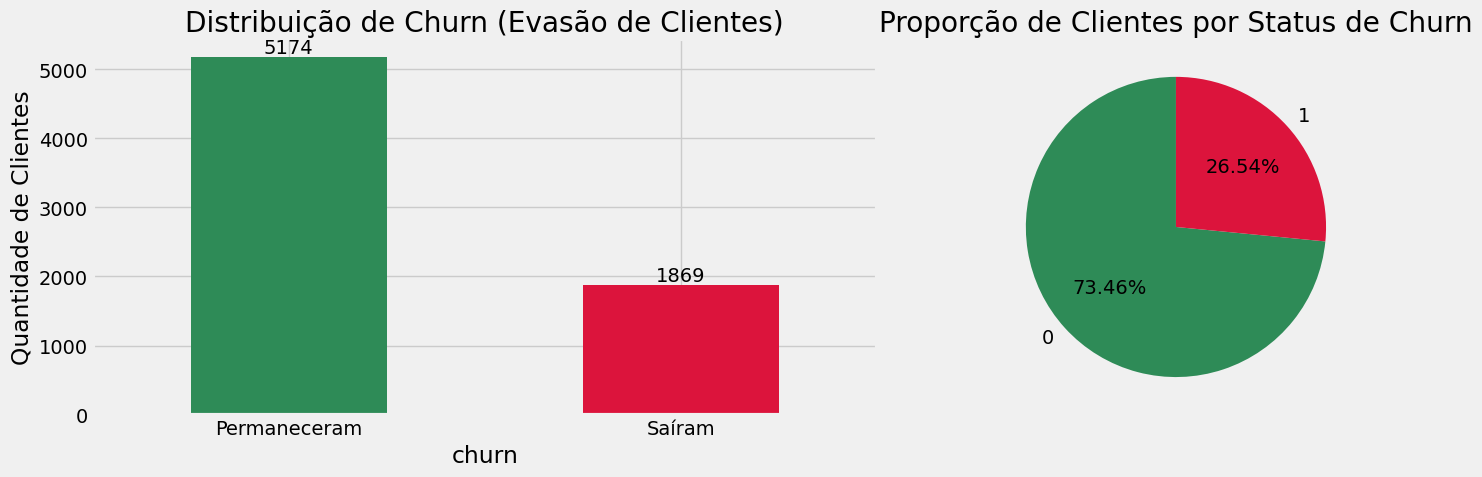

In [53]:
# Contagem dos valores de churn (removendo nulos para visualização)
contagem_churn = df['churn'].dropna().value_counts()

# Cores personalizadas
cores = ['#2E8B57', '#DC143C']  # verde para 0 (permaneceu), vermelho para 1 (saiu)

# Criar subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de barras
contagem_churn.plot(kind='bar', color=cores, ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Permaneceram', 'Saíram'], rotation=0)
axes[0].set_ylabel('Quantidade de Clientes')
axes[0].set_title('Distribuição de Churn (Evasão de Clientes)')
# Adicionar rótulos de dados ao gráfico de barras
for i, v in enumerate(contagem_churn):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Gráfico de pizza
contagem_churn.plot(kind='pie', autopct='%.2f%%', colors=cores, startangle=90, ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Proporção de Clientes por Status de Churn')

# Ajustar layout
plt.tight_layout()
plt.show()


In [26]:
# Cria um dataframe só com clientes que deram churn = 1

df_churned = df[df['churn'] == 1]
df_churned.head()

,id_cliente,churn,genero,cidadao_senior,parceiro,dependentes,tempo_de_contrato,servico_telefone,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_sem_papel,metodo_pagamento,total_servicos_mes,total_gasto
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40
18,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,...,0,1,0,0,1,One year,0,Credit card (automatic),62.7,2791.50
19,0023-HGHWL,1,Male,1,0,0,1,0,<NA>,DSL,...,0,0,0,0,0,Month-to-month,1,Electronic check,25.1,25.10


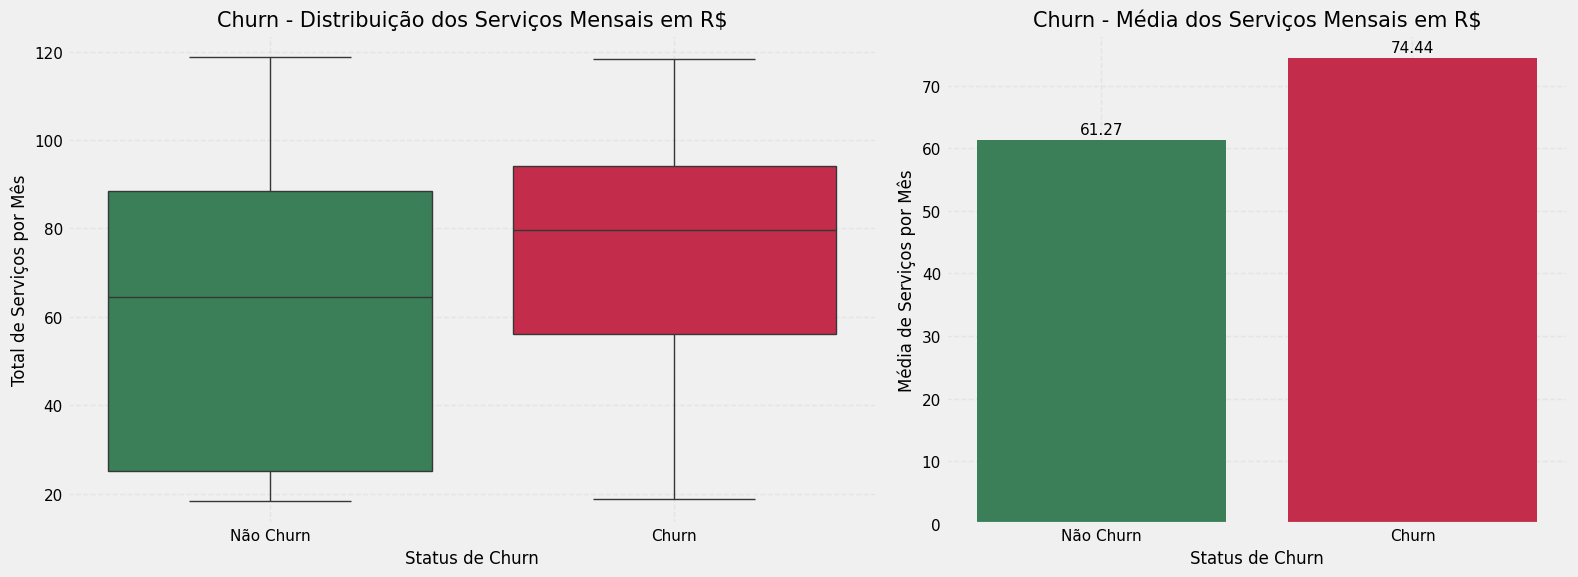

In [94]:
# Visão do gasto mensal dos clientes churn = 1 e churn=0

gasto_mensal_medio_churn = df.groupby('churn')['total_servicos_mes'].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1.3, 1]})

# -------- Gráfico 1: Boxplot --------
sns.boxplot(
    x='churn',
    y='total_servicos_mes',
    data=df,
    ax=axes[0],
    palette=['#2E8B57', '#DC143C']
)
axes[0].set_title('Churn - Distribuição dos Serviços Mensais em R$', fontsize=15)
axes[0].set_xlabel('Status de Churn', fontsize=12)
axes[0].set_ylabel('Total de Serviços por Mês', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não Churn', 'Churn'])
axes[0].tick_params(labelsize=11)
axes[0].grid(True, linestyle='--', alpha=0.3)

# -------- Gráfico 2: Barplot da média --------
sns.barplot(
    x='churn',
    y='total_servicos_mes',
    data=gasto_mensal_medio_churn,
    ax=axes[1],
    palette=['#2E8B57', '#DC143C']
)
axes[1].set_title('Churn - Média dos Serviços Mensais em R$', fontsize=15)
axes[1].set_xlabel('Status de Churn', fontsize=12)
axes[1].set_ylabel('Média de Serviços por Mês', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não Churn', 'Churn'])
axes[1].tick_params(labelsize=11)
axes[1].grid(True, linestyle='--', alpha=0.3)

# Rótulos no topo das barras
for index, row in gasto_mensal_medio_churn.iterrows():
    axes[1].text(index, row['total_servicos_mes'] + 1,
                 round(row['total_servicos_mes'], 2),
                 color='black', ha='center', fontsize=11)

plt.tight_layout()
plt.show()




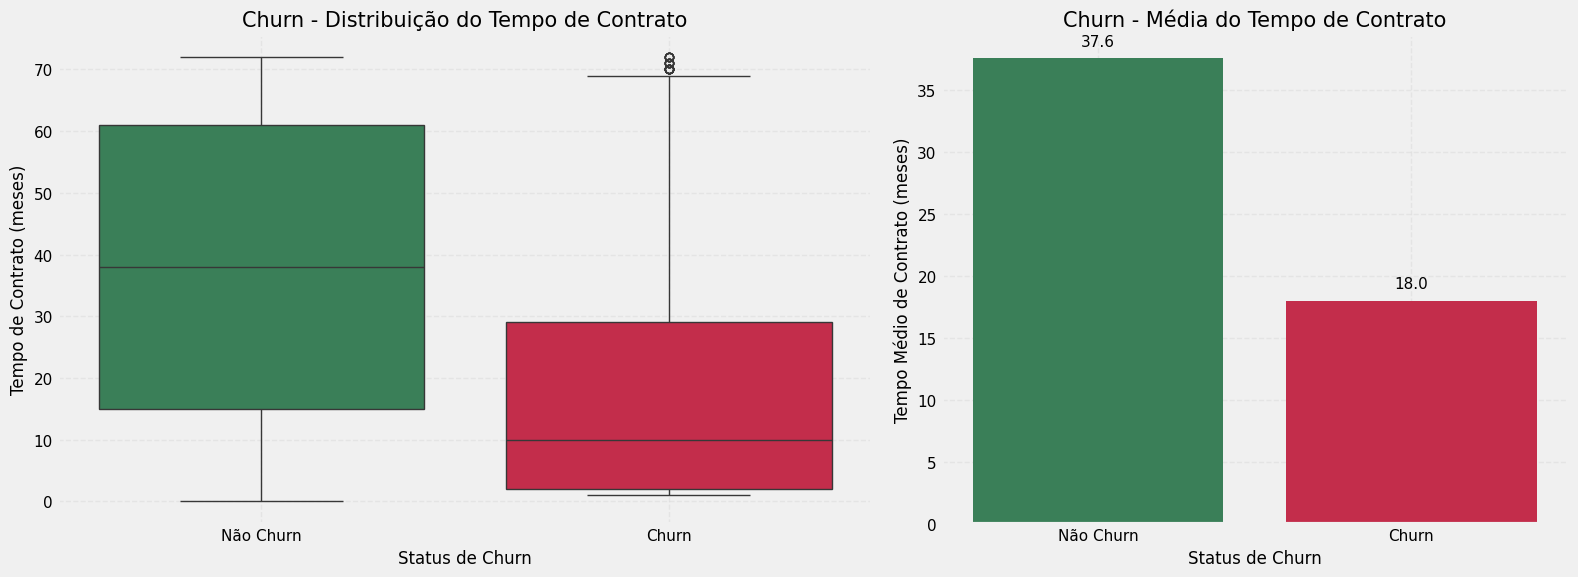

In [54]:
# Visão da evasão pelo tempo de contrato

# Calcular a média do tempo de contrato por status de churn
tempo_medio_churn = df.groupby('churn')['tempo_de_contrato'].mean().reset_index()

# Criar subplots com dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1.3, 1]})

# -------- Gráfico 1: Boxplot --------
sns.boxplot(
    x='churn',
    y='tempo_de_contrato',
    data=df,
    ax=axes[0],
    palette=['#2E8B57', '#DC143C']
)
axes[0].set_title('Churn - Distribuição do Tempo de Contrato', fontsize=15)
axes[0].set_xlabel('Status de Churn', fontsize=12)
axes[0].set_ylabel('Tempo de Contrato (meses)', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não Churn', 'Churn'])
axes[0].tick_params(labelsize=11)
axes[0].grid(True, linestyle='--', alpha=0.3)

# -------- Gráfico 2: Barplot da média --------
sns.barplot(
    x='churn',
    y='tempo_de_contrato',
    data=tempo_medio_churn,
    ax=axes[1],
    palette=['#2E8B57', '#DC143C']
)
axes[1].set_title('Churn - Média do Tempo de Contrato', fontsize=15)
axes[1].set_xlabel('Status de Churn', fontsize=12)
axes[1].set_ylabel('Tempo Médio de Contrato (meses)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não Churn', 'Churn'])
axes[1].tick_params(labelsize=11)
axes[1].grid(True, linestyle='--', alpha=0.3)

# Rótulos no topo das barras
for index, row in tempo_medio_churn.iterrows():
    axes[1].text(index, row['tempo_de_contrato'] + 1,
                 round(row['tempo_de_contrato'], 1),
                 color='black', ha='center', fontsize=11)

plt.tight_layout()
plt.show()


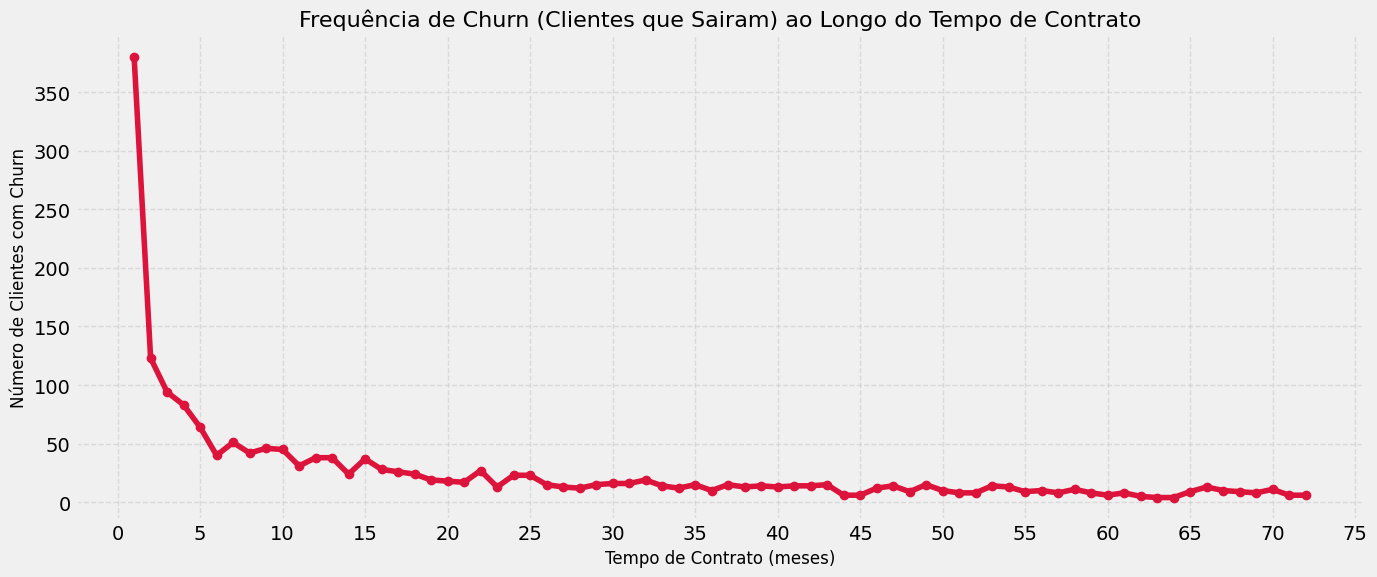

In [55]:
# Visão ao longo do tempo de churn =1 pelo Tempo de Contrato

churn_por_tempo = df[df['churn'] == 1]['tempo_de_contrato'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
churn_por_tempo.plot(kind='line', marker='o', linestyle='-', color='#DC143C')
plt.title('Frequência de Churn (Clientes que Sairam) ao Longo do Tempo de Contrato', fontsize=16)
plt.xlabel('Tempo de Contrato (meses)', fontsize=12)
plt.ylabel('Número de Clientes com Churn', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, df['tempo_de_contrato'].max() + 5, 5)) # Define os ticks do eixo x a cada 5 meses
plt.tight_layout()
plt.show()

### Análise por categoria

In [27]:
# Visão por genero

genero_churn = df_churned.groupby('genero')['churn'].sum()
genero_churn

,churn
genero,
Female,939
Male,930


In [29]:
# Visão por genero

genero_churn = df_churned.groupby('genero')['churn'].sum()
genero_churn

,churn
genero,
Female,939
Male,930


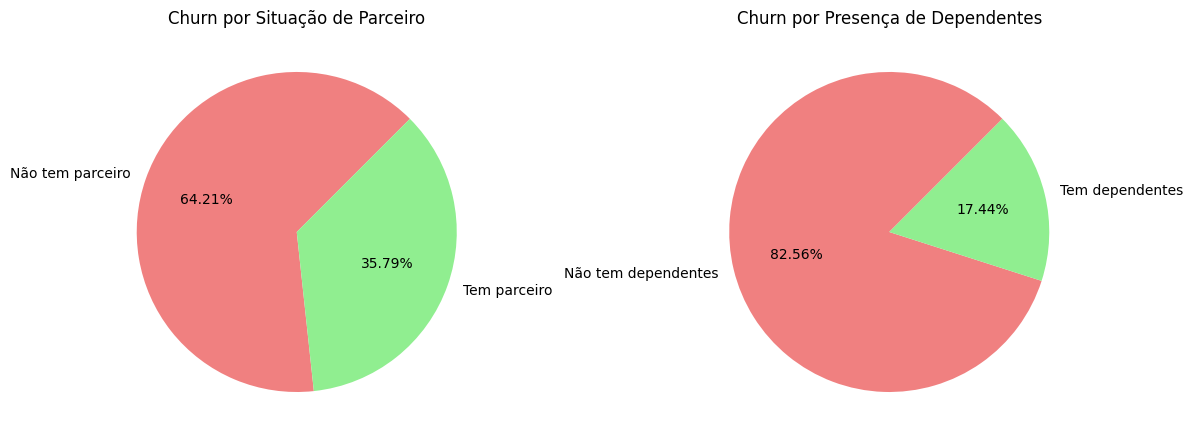

In [35]:
# Visão por familia

parceiro_churn = df_churned.groupby('parceiro')['churn'].count()
dependentes_churn = df_churned.groupby('dependentes')['churn'].count()

# Criar figura com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pizza: parceiro
axes[0].pie(
    parceiro_churn,
    labels=['Não tem parceiro', 'Tem parceiro'],
    autopct='%.2f%%',
    startangle=45,
    colors=['#F08080', '#90EE90']
)
axes[0].set_title('Churn por Situação de Parceiro')

# Pizza: dependentes
axes[1].pie(
    dependentes_churn,
    labels=['Não tem dependentes', 'Tem dependentes'],
    autopct='%.2f%%',
    startangle=45,
    colors=['#F08080', '#90EE90']
)
axes[1].set_title('Churn por Presença de Dependentes')

plt.tight_layout()
plt.show()

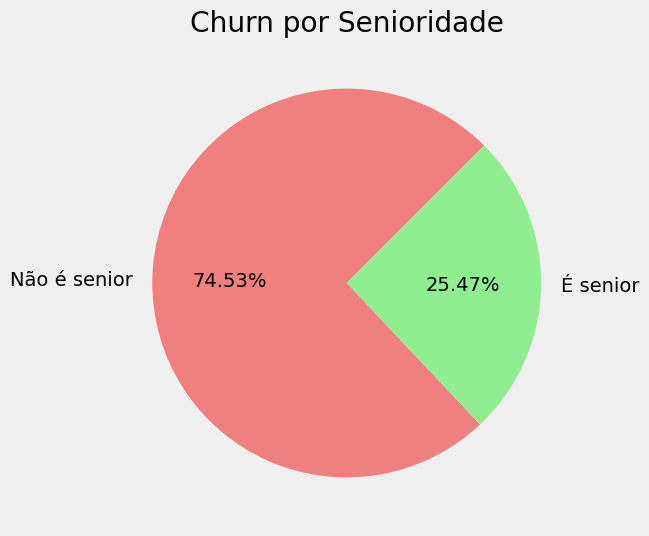

In [39]:
# Visão por senioridade

# Agrupa os clientes que cancelaram (churn = 1) por senioridade
senior_churn = df_churned['cidadao_senior'].value_counts().sort_index()

# Mapeia os rótulos corretos com base no índice
labels = senior_churn.index.map({0: 'Não é senior', 1: 'É senior'})

# Plot com estilo fivethirtyeight
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 6))
    plt.pie(
        senior_churn,
        labels=labels,
        autopct='%.2f%%',
        startangle=45,
        colors=['#F08080', '#90EE90']
    )
    plt.title('Churn por Senioridade')
    plt.show()


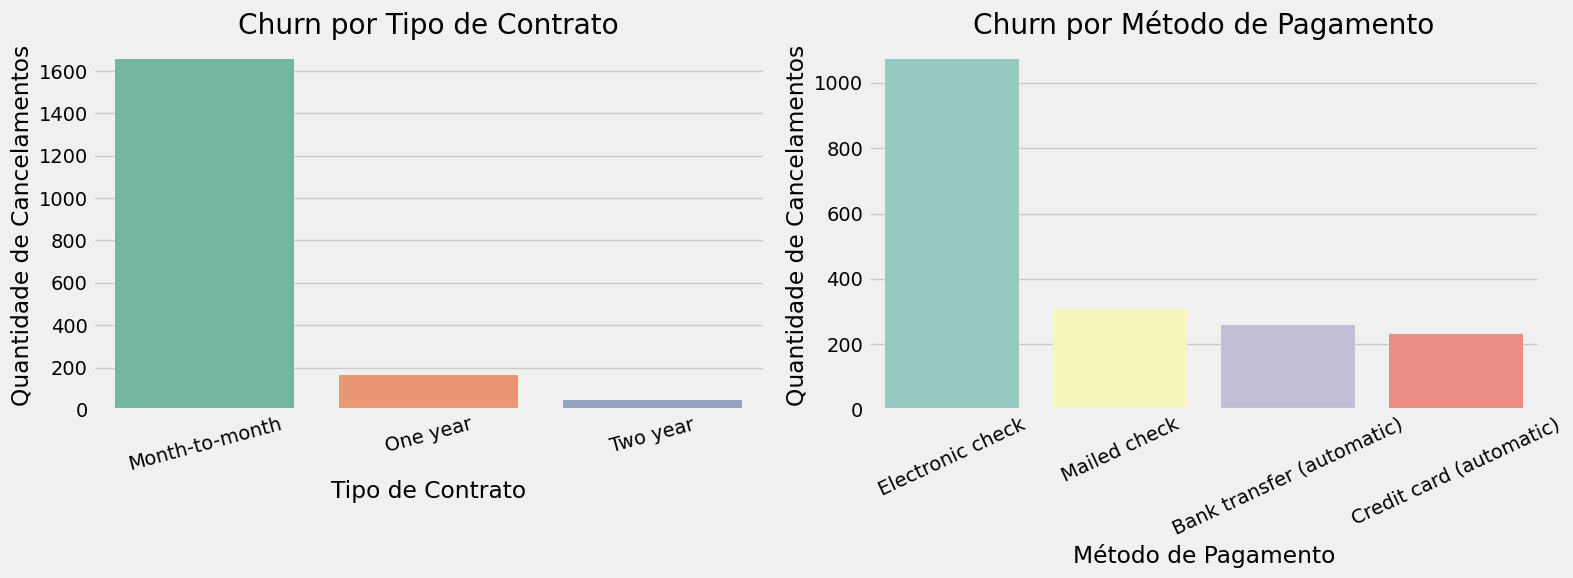

In [40]:
# Visão por tipo de contrato e formas de pagamento
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# -------- Gráfico de barras: Tipo de contrato --------
contrato_churn = df_churned['contrato'].value_counts()

sns.barplot(
    x=contrato_churn.index,
    y=contrato_churn.values,
    ax=axes[0],
    palette='Set2'
)
axes[0].set_title('Churn por Tipo de Contrato')
axes[0].set_ylabel('Quantidade de Cancelamentos')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].tick_params(axis='x', rotation=15)

# -------- Gráfico de barras: Método de pagamento --------
pagamento_churn = df_churned['metodo_pagamento'].value_counts()

sns.barplot(
    x=pagamento_churn.index,
    y=pagamento_churn.values,
    ax=axes[1],
    palette='Set3'
)
axes[1].set_title('Churn por Método de Pagamento')
axes[1].set_ylabel('Quantidade de Cancelamentos')
axes[1].set_xlabel('Método de Pagamento')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

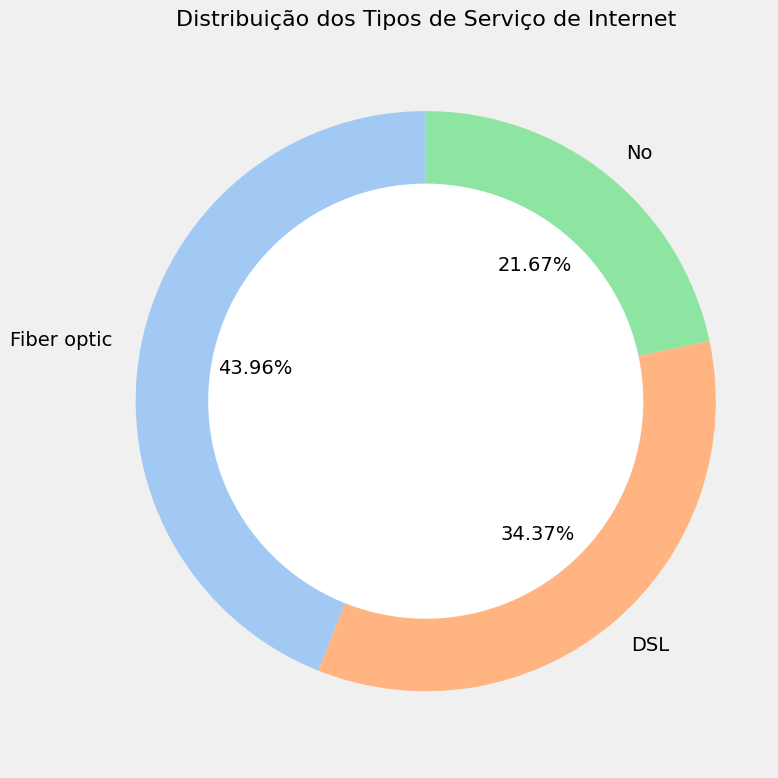

In [58]:
# Visão pelo tipo de internet contratada

# Agrupar e contar a frequência de cada tipo de serviço de internet
servico_internet_counts = df['servico_internet'].value_counts().reset_index()
servico_internet_counts.columns = ['Serviço de Internet', 'Quantidade']

# Definir cores para o gráfico
colors = sns.color_palette('pastel')[0:len(servico_internet_counts)]

# Criar o gráfico de rosca
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(servico_internet_counts['Quantidade'], labels=servico_internet_counts['Serviço de Internet'], autopct='%.2f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adicionar título
plt.title('Distribuição dos Tipos de Serviço de Internet', fontsize=16)
ax.axis('equal')
plt.tight_layout()
plt.show()

In [70]:
df['multiplas_linhas'].unique()

<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64

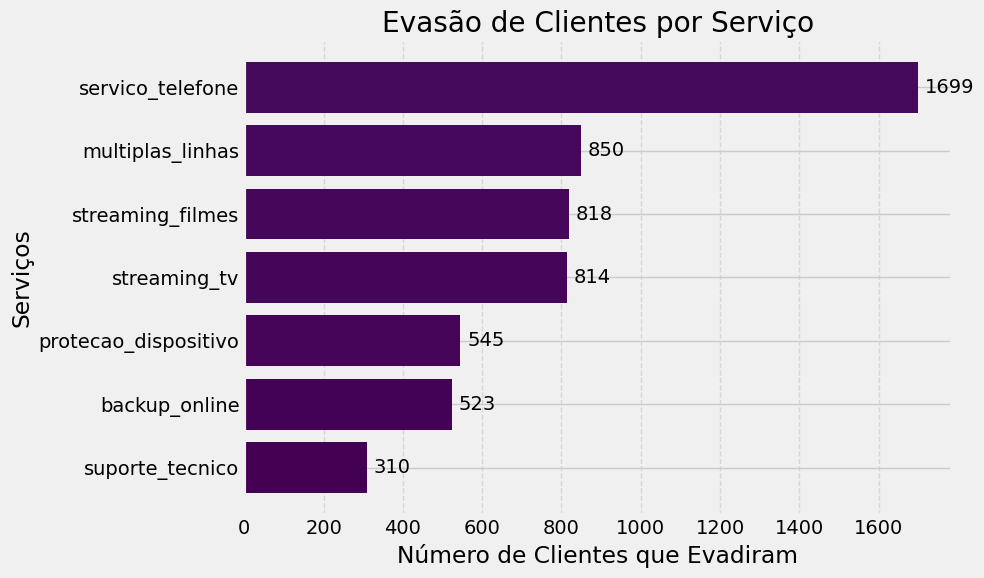

In [72]:
# Visão pelos serviços servidos
servicos = ['multiplas_linhas', 'servico_telefone',
            'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
            'streaming_tv', 'streaming_filmes']

df_churned = df_churned.copy()
for col in servicos:
    df_churned[col] = pd.to_numeric(df_churned[col], errors='coerce').fillna(0)

evasao_por_servico = df_churned[servicos].sum().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(evasao_por_servico.index, evasao_por_servico.values, color=plt.cm.viridis(range(len(evasao_por_servico))))

plt.title('Evasão de Clientes por Serviço')
plt.xlabel('Número de Clientes que Evadiram')
plt.ylabel('Serviços')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar valores ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(evasao_por_servico.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.tight_layout()
plt.show()


In [74]:
corr = df.corr(numeric_only=True)
print(corr['churn'].sort_values(ascending=False))

churn                   1.000000
total_servicos_mes      0.193356
fatura_sem_papel        0.191825
cidadao_senior          0.150889
multiplas_linhas        0.040207
servico_telefone        0.011942
streaming_tv           -0.037057
streaming_filmes       -0.040132
parceiro               -0.150448
dependentes            -0.164221
protecao_dispositivo   -0.177125
backup_online          -0.196061
total_gasto            -0.199484
suporte_tecnico        -0.274422
seguranca_online       -0.280816
tempo_de_contrato      -0.352229
Name: churn, dtype: float64


Contratos longos + serviços de proteção (backup, segurança online, suporte técnico) ajudam a reduzir churn.

Clientes mais idosos e que usam fatura digital têm mais propensão a sair.

O gasto total e dependentes/partner indicam maior fidelidade.

Streaming e telefone quase não influenciam no churn.

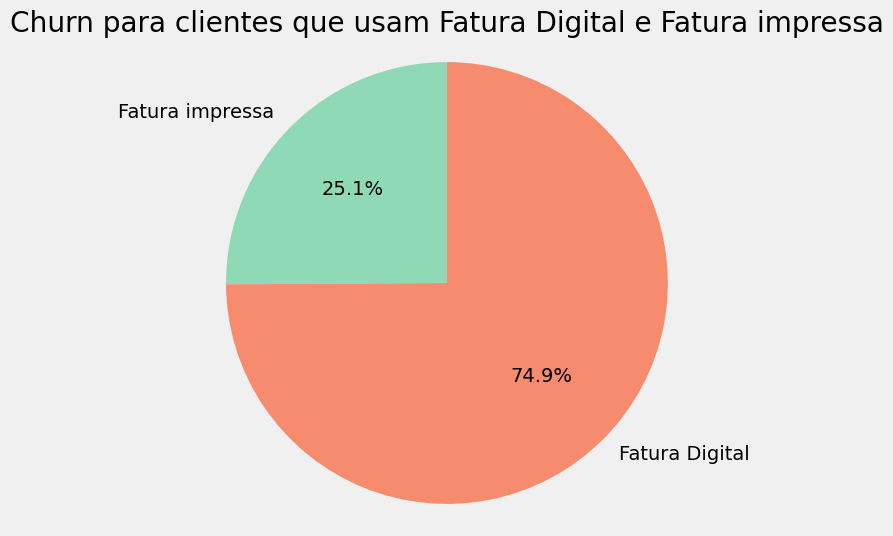

In [92]:
# Contagem dos churned por fatura sem papel
contagem_paperless = df_churned['fatura_sem_papel'].value_counts().sort_index()

labels = ['Fatura impressa', 'Fatura Digital']

plt.figure(figsize=(6,6))
plt.pie(contagem_paperless, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#8fd9b6','#f68b6e'])
plt.title('Churn para clientes que usam Fatura Digital e Fatura impressa')
plt.axis('equal')
plt.show()


#📄Relatorio Final

## **Objetivo do Projeto:**

O principal objetivo do projeto "Churn de Clientes" da Telecom X é entender os fatores que levam à perda de clientes, identificar o perfil dos clientes que evadem e propor estratégias para reter os clientes atuais e melhorar a qualidade do serviço.

**Cenário Atual de Churn:**

A Telecom X enfrenta uma taxa de churn significativa: 26.54% dos seus clientes evadiram. O que reforça a importância para tomadas de decisões com objetivo de mitigar essa perda.

## **Perfil dos clientes que deram Churn**

### **1. Clientes novos**

O churn é extremamente elevado nos primeiros meses de contrato, com um pico significativo logo no primeiro mês. A média de tempo de contrato para clientes que churnam é de apenas 18 meses, comparado a 37.6 meses para clientes que permanecem.

### **2. Contratos Mensais**

A maioria dos cancelamentos (mais de 1600) provém de clientes com contratos mensais, que representam a maior parte da base de clientes. Contratos de um ou dois anos têm um volume de churn muito baixo. Contratos mensais tornam a saída do cliente mais fácil.

### **3. Método de Pagamento "Cheque Eletrônico":**

Clientes que utilizam cheque eletrônico como forma de pagamento são os que mais churnam (mais de 1000 cancelamentos).
Podemos dizer que esse método de pagamento está fortemente correlacionado com a evasão.

### **4. Fatura Digital (Fatura sem Papel):**

Clientes que optam pela fatura digital (fatura_sem_papel) têm maior propensão ao churn. Cerca de 75% dos churns são de clientes com fatura digital.


### **5. Alto Gasto Mensal:**

Clientes que churnam tendem a ter um gasto mensal médio ligeiramente maior
(Rs 74,44)  do que os que permanecem (Rs 61,27).
Clientes que pagam mais podem ter expectativas de serviço mais elevadas e, se não forem atendidas, a frustração pode ser maior.

###**6. Ausência de Serviços de Segurança e Suporte:**

A correlação mostra que clientes que possuem seguranca online e suporte tecnico têm significativamente menor probabilidade de churn.
Então podemos dizer que estes serviços adicionais atuam como fortes fatores de retenção.

### **7. Clientes Sem Parceiro e/ou Dependentes:**

A maioria dos clientes que churnam não possui parceiro (64.21%) ou dependentes (82.56%). Clientes com familias podem buscar maior estabilidade ou se beneficiar de planos mais vantajosos que incentivam a permanência.

### **8. Cidadãos Seniores:**

Proporcionalmente, cidadãos seniores são mais propensos a churnar (25.47% dos churns são de seniores, enquanto eles representam 16.21% da base total).
Este segmento pode ter necessidades específicas de atendimento ou suporte que não estão sendo totalmente supridas.

### **Fatores com Impacto Menor:**

Gênero, serviço de telefone e serviços de streaming (TV e Filmes) não mostraram ser fatores significativos de churn por si só.


## **Recomendações de ações**

**1. Programa de Onboarding e Engajamento Proativo (Foco nos Primeiros Meses):**

Ação: Implementar um programa intensivo de contato nos primeiros 90 dias de contrato. Isso pode incluir ligações de boas-vindas, acompanhamento da ativação do serviço, canais de suporte dedicados para "novos clientes" e pesquisas de satisfação proativas para identificar e resolver problemas rapidamente.
Objetivo: Reduzir o churn de clientes recém-adquiridos.



**2. Incentivo à Fidelização com Contratos Mais Longos:**

Ação: Desenvolver ofertas e campanhas atraentes para converter clientes de contrato mensal em planos de 1 ou 2 anos. Oferecer descontos na mensalidade, serviços adicionais gratuitos por um período, ou upgrades de planos para quem optar por contratos mais longos.
Objetivo: Aumentar a barreira de saída e a lealdade do cliente.



**3. Otimização e Análise do Método de Pagamento "Cheque Eletrônico":**

Ação: Realizar uma investigação aprofundada sobre a experiência de clientes que usam cheque eletrônico. Pode ser necessário simplificar o processo, oferecer suporte mais robusto para este método, ou incentivar a migração para métodos de pagamento automáticos (débito em conta/cartão de crédito) com pequenos bônus ou descontos.
Objetivo: Eliminar atritos no processo de pagamento que levam ao churn.



**4. Aprimoramento da Experiência da Fatura Digital e Engajamento Online:**

Ação: Garantir que o portal do cliente e o aplicativo sejam intuitivos, funcionais e ofereçam valor agregado além da fatura (ex: consumo detalhado, dicas de otimização, ofertas personalizadas). Desenvolver estratégias de comunicação e engajamento que mantenham esses clientes conectados à marca no ambiente digital.
Objetivo: Transformar a fatura digital de um fator de risco em um canal de fidelização.



**5. Gestão de Expectativas e Valor para Clientes de Alto Gasto Mensal:**

Ação: Garantir que os clientes com planos de maior valor recebam um serviço e um suporte que justifiquem o investimento. Isso pode envolver atendimento prioritário, monitoramento proativo de desempenho do serviço e comunicação transparente sobre os benefícios premium de seus pacotes.
Objetivo: Alinhar o valor percebido com o preço pago e reduzir a insatisfação.



**6. Promoção Intensiva de Serviços de Segurança Online e Suporte Técnico:**

Ação: Posicionar seguranca online e suporte tecnico como diferenciais de retenção. Oferecer esses serviços como parte de pacotes, ou com promoções atrativas, especialmente para novos clientes. Educar os clientes sobre o valor e a tranquilidade que esses serviços proporcionam.
Objetivo: Aumentar a adesão a serviços que comprovadamente retêm clientes.


**7. Segmentação e Ofertas Direcionadas:**

Ação: Criar campanhas e planos específicos para segmentos mais vulneráveis, como clientes sem parceiro/dependentes e cidadãos seniores, levando em conta suas necessidades e comportamentos. Para seniores, garantir canais de atendimento mais acessíveis e um suporte que priorize a clareza e a paciência.
Objetivo: Atender às particularidades de cada grupo e aumentar sua satisfação.